In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

   

# 使用示例
image_path = "airfoil.png"  # 替换为你的图像路径
output_dat_path = "airfoil.dat"    # 输出文件名
num_points = 100

# 1. 读取图像并预处理
img = cv2.imread(image_path)
if img is None:
    raise ValueError("无法加载图像，请检查路径是否正确")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rect_kernel = np.ones((3, 3), np.uint8) 
gray = cv2.erode(gray, rect_kernel, iterations=4)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
# _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


In [180]:
smoothed_image = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(smoothed_image, 100, 200)
contours ,_ = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
if not contours:
    raise ValueError("未检测到轮廓")

cv2.drawContours(img,contours,-1,(0,255,0), 2)
cv2.imshow("Image",img)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [181]:


# # 取最大的轮廓
# largest_contour = max(contours, key=cv2.contourArea)
# largest_contour[:,:,1] = -largest_contour[:,:,1]

# cv2.drawContours(img, largest_contour,-1, (0,0,255), 3)
# cv2.imshow("Image",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.plot(largest_contour[:,0,0],largest_contour[:,0,1])
# # plt.show()


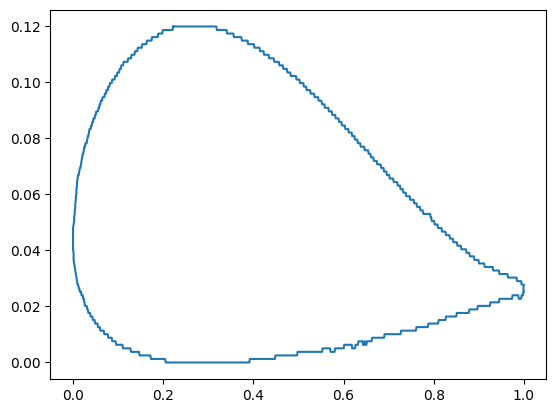

In [182]:
# contours[:,:,1] = - contours[:,:,1]
largest_contour = contours[0]
largest_contour[:,:,1] = -largest_contour[:,:,1]
# plt.plot(largest_contour[:,:,0],largest_contour[:,:,1])
flipped_contour = largest_contour[::-1]
    
# 4. 将轮廓转换为Nx2数组
points = flipped_contour.squeeze()
# 6. 归一化坐标（使弦长为1）
x_min, x_max = np.min(points[:,0]), np.max(points[:,0])
y_min, y_max = np.min(points[:,1]), np.max(points[:,1])
chord_length = x_max - x_min
normalized_points = (points - [x_min, y_min]) / chord_length
plt.plot(normalized_points[:,0],normalized_points[:,1])


In [183]:

# 6. 分离上表面和下表面
# 以y坐标中值为界分离上下表面
y_median = np.median(normalized_points[:, 1])
upper = normalized_points[normalized_points[:, 1] > y_median]
lower = normalized_points[normalized_points[:, 1] <= y_median]

# 对上表面点按x升序排列，下表面按x降序排列
upper = upper[upper[:, 0].argsort()[::-1]]
lower = lower[lower[:, 0].argsort()]

# 7. 均匀采样点
def sample_points(points, n):
    """均匀采样n个点"""
    indices = np.linspace(0, len(points)-1, n, dtype=int)
    return points[indices]

sampled_upper = sample_points(upper, num_points//2)
sampled_lower = sample_points(lower, num_points//2)

# 8. 合并点并确保从后缘开始，上表面->前缘->下表面->后缘
combined = np.vstack([sampled_upper, sampled_lower])

# 9. 写入DAT文件
with open(output_dat_path, 'w') as f:
    f.write(f"Airfoil extracted from {image_path}\n")
    for point in combined:
        f.write(f"{point[0]:.6f}    {point[1]:.6f}\n")

print(f"成功将翼型坐标写入 {output_dat_path}")


成功将翼型坐标写入 airfoil.dat
